<a href="https://colab.research.google.com/github/pysr1/h2o/blob/master/h2o_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up h2o colab:

1) Install java

In [0]:
%%bash

apt-get install default-jre


Reading package lists...
Building dependency tree...
Reading state information...
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


Cloning into 'h2o-3'...
Checking out files: 100% (6495/6495), done.
openjdk version "11.0.4" 2019-07-16
OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3)
OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)


2) Pip install the latest version of h2o:

In [0]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [0]:
%%bash 

ls

h2o-3
sample_data


## Import h2o:

We can import h2o and start the cluster. 

In [0]:
from h2o.estimators.kmeans import H2OKMeansEstimator
import h2o
import math as math
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')



h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.4" 2019-07-16; OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3); OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7vdfg9xn
  JVM stdout: /tmp/tmp7vdfg9xn/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7vdfg9xn/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.2
H2O cluster version age:,25 days
H2O cluster name:,H2O_from_python_unknownUser_6qmk00
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


H2o is a really great machine learning ecosystem for business and production use cases. It has a great REST API, which can be called easily with R, python, java & javascript packages.  It also provides a pandas like API for working with large tabular data. H2o can even be used with Apache Spark!  

When compared with sklearn, h2o is definatley faster.  H2o does not offfer the breadth of algorithms that sklearn does, but it does provides pretty much every algorithm I ever use in practice. (I wish it included UMAP object, Bayesian additive regression trees, and a other bayesian models)

In [0]:
iris = h2o.import_file(path="https://github.com/h2oai/h2o-3/raw/master/h2o-r/h2o-package/inst/extdata/iris_wheader.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


We can use the describe method to get a similar output to what we would get with pandas. I honestly dislke the way this displays in the notebook.

In [0]:
print(iris.describe())

Rows:150
Cols:5




,sepal_len,sepal_wid,petal_len,petal_wid,class
type,real,real,real,real,enum
mins,4.3,2.0,1.0,0.1,
mean,5.843333333333333,3.053999999999999,3.758666666666667,1.1986666666666665,
maxs,7.9,4.4,6.9,2.5,
sigma,0.8280661279778637,0.43359431136217375,1.764420419952262,0.7631607417008414,
zeros,0,0,0,0,
missing,0,0,0,0,0
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


None


We'll try anywhere from a 2 to 13 cluster solution for our clustering problem.

In [0]:
results = [H2OKMeansEstimator(k=clusters, init="Random", seed=2, standardize=True) for clusters in range(2,13)]
for estimator in results:
    estimator.train(x=iris.col_names[0:-1], training_frame = iris)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%


We'll define a simple function to measure model fit:

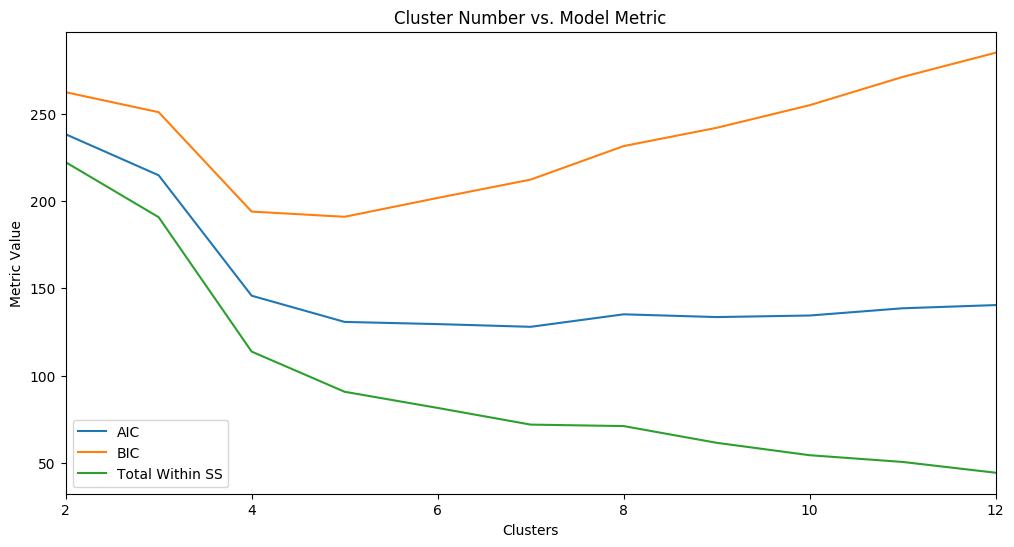

In [0]:
def diagnostics_from_clusteringmodel(model):
    total_within_sumofsquares = model.tot_withinss()
    number_of_clusters = len(model.centers())
    number_of_dimensions = len(model.centers()[0])
    number_of_rows = sum(model.size())
    
    aic = total_within_sumofsquares + 2 * number_of_dimensions * number_of_clusters
    bic = total_within_sumofsquares + math.log(number_of_rows) * number_of_dimensions * number_of_clusters
    
    return {'Clusters':number_of_clusters,
            'Total Within SS':total_within_sumofsquares, 
            'AIC':aic, 
            'BIC':bic}
  
diagnostics = pd.DataFrame( [diagnostics_from_clusteringmodel(model) for model in results])
diagnostics.set_index('Clusters', inplace=True)


diagnostics.plot(kind='line', figsize = (12, 6))
plt.title('Cluster Number vs. Model Metric')
plt.ylabel('Metric Value')
plt.show()

In [0]:
# number of clusters with minimum BIC
cluster_num = diagnostics[diagnostics['BIC'] == diagnostics['BIC'].min()].index.values[0]

In [0]:
clusters = 5
predicted = results[clusters-2].predict(iris)
iris["Predicted"] = predicted["predict"].asfactor()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [0]:
iris_df = iris.as_data_frame(True)
iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class,Predicted
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,2


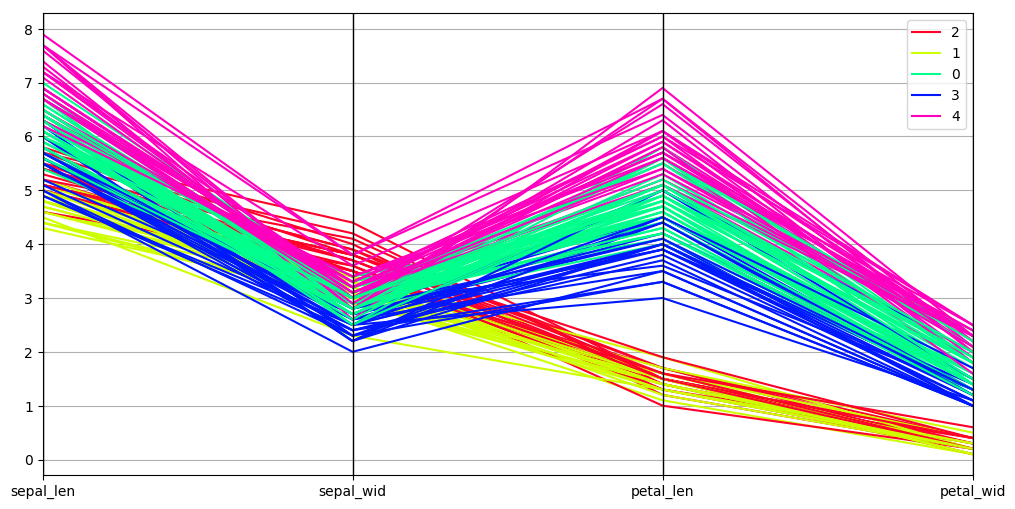

In [0]:
from pandas.plotting import parallel_coordinates
plt.style.use('default')
plt.figure(figsize = (12, 6))
parallel_coordinates(iris_df.drop('class', 1) , 'Predicted', colormap= 'gist_rainbow')

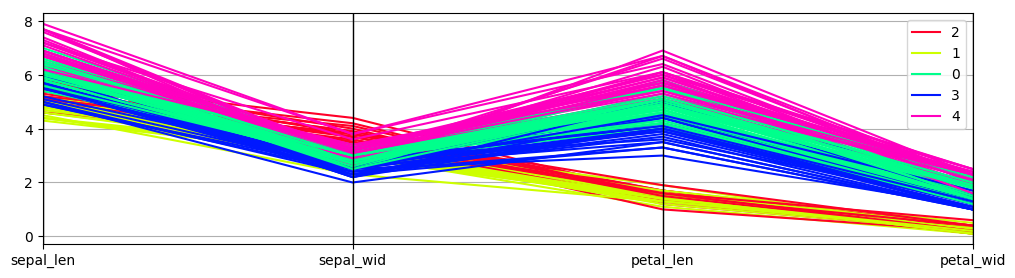

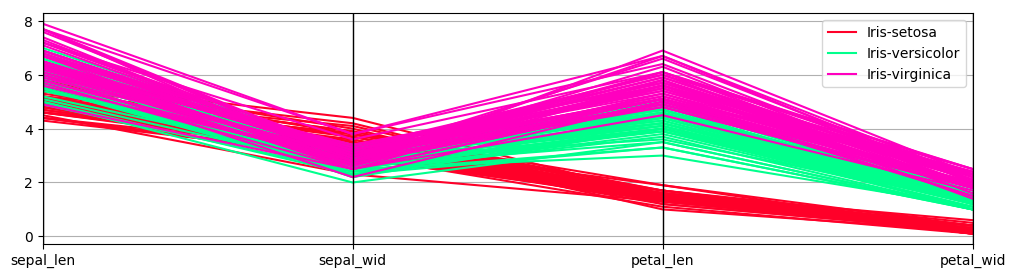

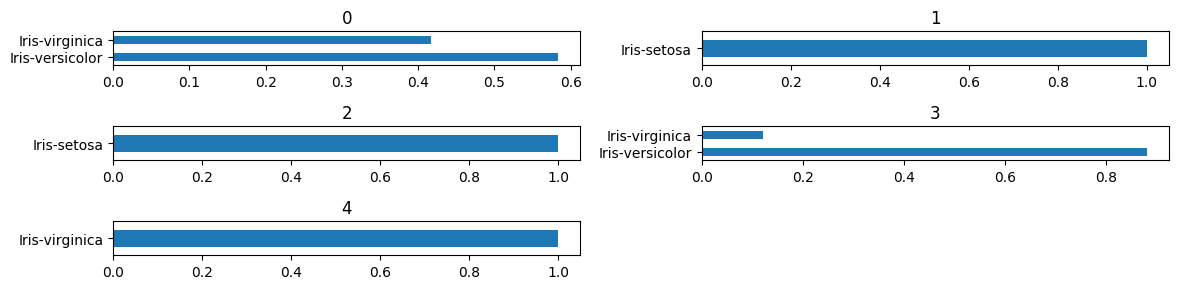

In [0]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize = (12, 3))
parallel_coordinates(iris_df.drop('class', 1) , 'Predicted', colormap= 'gist_rainbow')


plt.figure(figsize = (12, 3))
parallel_coordinates(iris_df.drop('Predicted', 1), 'class', colormap= 'gist_rainbow')
plt.show()


fig, ax = plt.subplots(3, 2, figsize = (12, 3))
ax = ax.ravel()

for i, j in enumerate(sorted(iris_df.Predicted.unique())):
  df = iris_df[iris_df['Predicted'] == j]
  (df['class'].value_counts() / len(df)).plot(kind = 'barh', ax = ax[i])
  ax[i].set_title(j)
ax[5].axis('off')
plt.tight_layout()

plt.show()





In [0]:
iris_df.groupby('Predicted')['sepal_len'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Predicted,,,,,,,,
1,27.0,4.785185,0.242905,4.3,4.600,4.80,5.000,5.2
2,23.0,5.265217,0.277339,4.6,5.100,5.20,5.400,5.8
3,25.0,5.564000,0.379561,4.9,5.500,5.60,5.800,6.3
0,48.0,6.210417,0.373733,5.4,5.975,6.25,6.425,7.0
4,27.0,7.000000,0.498459,6.2,6.700,6.90,7.350,7.9


In [0]:
iris_df.query("Predicted == 2").sort_values('petal_len').head(1)

,sepal_len,sepal_wid,petal_len,petal_wid,class,Predicted
22,4.6,3.6,1.0,0.2,Iris-setosa,2
